The weakest link in the network is ('Victor_Conte', 'Victor_Conte') with a betweenness centrality of 0.0


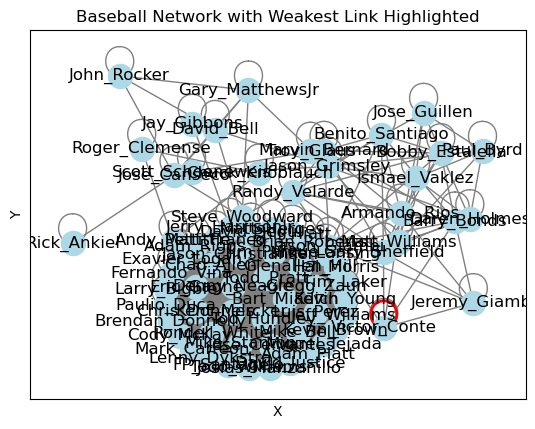

In [9]:
# David Harrison
# STC 510
# Module 6 project


# Note: the resulting node and edge graph is over-populated, but I stalled at trying to figure out how to make it more readible...


import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
from io import BytesIO
import urllib.request

# Download and extract baseball.zip form the below link:
url = 'http://www.casos.cs.cmu.edu/tools/datasets/external/baseball/baseball.zip'
# Extract the .csv data using urllib:
with urllib.request.urlopen(url) as stream:
    with ZipFile(BytesIO(stream.read())) as archive:
        # Read the baseball data file into a dataframe using pandas. Also set the the row labels as the values in the first column:
        df = pd.read_csv(archive.open('BASEBALL_1M.csv'), index_col=0)

# Convert the dataframe to an edgelist using pandas melt function - each row is an "edge":
# Keep the first column as the source node and name the columns "variable" and "value"
df_edges = pd.melt(df.reset_index(), id_vars='index')

# Remove zeros in the dataframe:
df_edges = df_edges[df_edges['value'] > 0]

# Use Networkx to create graph object from the edge list dataframe  
# Tell Networkx which is the index column and which is the variable column, and use the value as the edge attribute:
G = nx.from_pandas_edgelist(df_edges, source='index', target='variable', edge_attr='value')

# Calculate the betweenness centrality for each identified edge
# Compute the betweenness centrality measure for each edge in the graph
edge_betweenness = nx.edge_betweenness_centrality(G)

# Calculate the betweenness centrality score for each link/edge , and then display the "weakest link" based and the associated centrality score:
weakest_link = min(edge_betweenness, key=edge_betweenness.get)

print(f"The weakest link in the network is {weakest_link} with a betweenness centrality of {edge_betweenness[weakest_link]}")

# Using the kamada_kawai layout to map the nodes and the edges (I tried the spring_layout, but then one of the noted connected. Not sure why/how) but the following method at least drew the connections):
pos = nx.kamada_kawai_layout(G)

# Draw the graph with the weakest link highlighted in red, and set thhe node positions and format:
nx.draw_networkx(G, pos=pos, node_color='lightblue', edge_color='gray')
# Highlight the weakest link by changing its edge color to red and increasing it's line width:
nx.draw_networkx_edges(G, pos=pos, edgelist=[weakest_link], edge_color='red', width=2)

# Add network graph axis labels and title, and display the graph:
plt.title('Baseball Steroid Network Investigation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
